In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd '/content/drive/My Drive/3. Introduction to Keras and TensorFlow'

/content/drive/My Drive/3. Introduction to Keras and TensorFlow



### CONSTANT TENSORS AND VARIABLES

In [ ]:
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print(x)

tf.Tensor(
[[ 2.2822442]
 [-1.0868273]
 [ 0.3867815]], shape=(3, 1), dtype=float32)


In [ ]:
x = np.random.normal(size=(3, 1), loc=0, scale=1)
print(x)

[[ 0.03617048]
 [-0.42150754]
 [-1.0920189 ]]


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[0.41484046]
 [0.9135101 ]
 [0.9210638 ]], shape=(3, 1), dtype=float32)


In [ ]:
print(x[0, 0])
x[0, 0] = -10

tf.Tensor(0.41484046, shape=(), dtype=float32)


TypeError: ignored

In [ ]:
x = np.random.uniform(size=(3, 1), low=10, high=1)
x

array([[2.33893622],
       [8.61350217],
       [7.33107258]])

In [ ]:
v = tf.Variable(initial_value=tf.random.uniform(shape=(2, 2), minval=1, maxval=10))
print(v)
v.assign(np.array([[1, 2], [3, 4]]))


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[7.8807354, 5.1794386],
       [5.0782075, 7.9014053]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [ ]:
v.assign_add([[1,2 ], [3, 4]])

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[2., 4.],
       [6., 8.]], dtype=float32)>

In [ ]:
a = tf.ones((2, 2))
print('a:', a)
b = tf.square(a)
print('b:', b)
c = tf.sqrt(a)
print('c:',c)
d = b + c 
print('d:', d)
e = tf.matmul(a, b)
print('e:',e)
f = a @ b
print('f:', f)
print('e*=d:', e*d)
print('e:', e)
print('e*d:',e * d)
print(tf.matmul(e, d))

a: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
b: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
c: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
d: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
f: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e*=d: tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
e: tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
e*d: tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


### A SECOND LOOK AT THE GradientTape API

In [ ]:
input_var = tf.Variable(initial_value=3, dtype=tf.float32)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
tape.gradient(result, input_var)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Using the GradientTape with constant tensor inputs

In [ ]:
input_const = tf.constant(3, dtype=tf.float32)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.sqrt(input_const)
tape.gradient(result, input_const)

<tf.Tensor: shape=(), dtype=float32, numpy=0.28867513>

Using nested gradient tapes to compute second-order gradients

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)
print(speed)

tf.Tensor(9.8, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


#### AN END-TO-END EXAMPLE: A LINEAR CLASSIFIER IN PURE TENSORFLOW

Generating two classes of random points in a 2D plane

In [ ]:

num_sample_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_sample_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_sample_per_class)
inputs = np.r_[negative_samples, positive_samples]
targets = np.vstack([np.zeros((num_sample_per_class, 1)), np.ones((num_sample_per_class, 1))]).astype('float32')

Plotting the two point classes

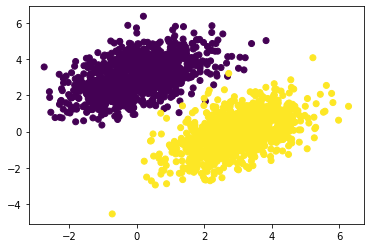

In [ ]:
import matplotlib.pyplot as plt 

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [ ]:
inputs.shape

(2000, 2)

Listing 3.17 Creating the linear classifier variables


In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim, 1)))

Listing 3.18 The forward pass function

In [ ]:
def model(inputs):
  return tf.matmul(inputs.astype('float32'), W) + b


Listing 3.19 The mean squared error loss function

In [ ]:
def square_loss(targets, predictions):
  return tf.reduce_mean(tf.square(targets - predictions))

Listing 3.20 The training step function

In [ ]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(learning_rate * grad_loss_wrt_W)
  b.assign_sub(learning_rate * grad_loss_wrt_b)
  return loss

Listing 3.21 The batch training loop

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print("Loss at the {}{} epoch is {}".format(
      step + 1,
      ['st', 'nd', 'rd'][step % 10] if (step + 1) % 10 in [1, 2, 3] else 'th',
      loss
  ))

Loss at the 1st epoch is 6.900146961212158
Loss at the 2nd epoch is 0.887129008769989
Loss at the 3rd epoch is 0.25284841656684875
Loss at the 4th epoch is 0.16530349850654602
Loss at the 5th epoch is 0.1446608453989029
Loss at the 6th epoch is 0.13299740850925446
Loss at the 7th epoch is 0.12323671579360962
Loss at the 8th epoch is 0.11445103585720062
Loss at the 9th epoch is 0.10646180808544159
Loss at the 10th epoch is 0.09918691217899323
Loss at the 11st epoch is 0.092561274766922
Loss at the 12nd epoch is 0.08652682602405548
Loss at the 13rd epoch is 0.08103076368570328
Loss at the 14th epoch is 0.0760250836610794
Loss at the 15th epoch is 0.07146602869033813
Loss at the 16th epoch is 0.06731373816728592
Loss at the 17th epoch is 0.06353190541267395
Loss at the 18th epoch is 0.06008751317858696
Loss at the 19th epoch is 0.05695042386651039
Loss at the 20th epoch is 0.05409324914216995
Loss at the 21st epoch is 0.05149098485708237
Loss at the 22nd epoch is 0.04912090301513672
Loss 

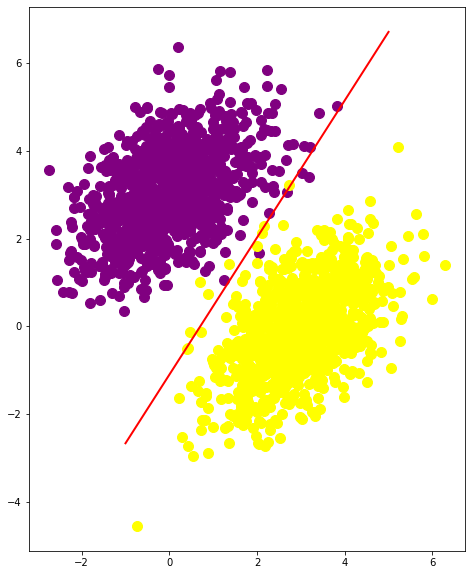

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
plt.plot(inputs[targets.squeeze()==0, 0], inputs[targets.squeeze()==0, 1], color='purple', marker='o', linestyle='', ms=10)
plt.plot(inputs[targets.squeeze()==1, 0], inputs[targets.squeeze()==1, 1], color='yellow', marker='o', linestyle='', ms=10)
x1 = np.linspace(-1, 5, 100)
x2 = (0.5 - W[0] * x1 - b) / W[1]
plt.plot(x1, tf.transpose(x2), 'r-', linewidth=2)
plt.gca().set_aspect('equal')

## 3.6 Anatomy of a neural network: understanding core Keras APIs

### 3.6.1 Layers: the building blocks of deep learning

#### THE BASE LAYER CLASS IN KERAS

In [6]:
from tensorflow import keras
import tensorflow as tf

In [7]:
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units),initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),initializer="zeros")
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [8]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)

AUTOMATIC SHAPE INFERENCE: BUILDING LAYERS ON THE FLY

In [28]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, losses, metrics
layer = layers.Dense(32, activation="relu")

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential(
    [
     layers.Dense(units=32, activation="relu"),
     layers.Dense(units=32)
    ]
)

In [11]:
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

In [12]:
model = models.Sequential([
SimpleDense(32, activation="relu"),
SimpleDense(64, activation="relu"),
SimpleDense(32, activation="relu"),
SimpleDense(10, activation="softmax")
])

In [13]:
model = models.Sequential([layers.Dense(units=1)])
model.compile(loss="mean_squared_error",
              optimizer="rmsprop",
              metrics=["accuracy"])

####3.6.3 The "compile" step: configuring the learning process

In [15]:
model = keras.models.Sequential([
                                 keras.layers.Dense(units=1)
                                 ])

In [24]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), 
              loss=keras.losses.MeanSquaredError(),             
              metrics=[keras.metrics.BinaryAccuracy()])

3.6.6 Monitoring loss & metrics on validation data

In [29]:
model = models.Sequential([layers.Dense(1)])
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss=losses.MeanSquaredError(),
              metrics=[metrics.BinaryAccuracy()])
indices_pert = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_pert]
shuffed_targets = targets=[indices_pert]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    x=training_inputs,
    y=training_targets,
    epochs=10,
    batch_size=16,
    
)